# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

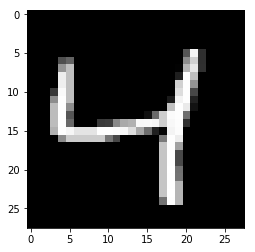

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name="input")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="target")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6847
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6578
Epoch: 1/20... Training loss: 0.6477
Epoch: 1/20... Training loss: 0.6357
Epoch: 1/20... Training loss: 0.6255
Epoch: 1/20... Training loss: 0.6107
Epoch: 1/20... Training loss: 0.5929
Epoch: 1/20... Training loss: 0.5793
Epoch: 1/20... Training loss: 0.5611
Epoch: 1/20... Training loss: 0.5465
Epoch: 1/20... Training loss: 0.5245
Epoch: 1/20... Training loss: 0.5089
Epoch: 1/20... Training loss: 0.4888
Epoch: 1/20... Training loss: 0.4676
Epoch: 1/20... Training loss: 0.4537
Epoch: 1/20... Training loss: 0.4373
Epoch: 1/20... Training loss: 0.4238
Epoch: 1/20... Training loss: 0.4079
Epoch: 1/20... Training loss: 0.3912
Epoch: 1/20... Training loss: 0.3795
Epoch: 1/20... Training loss: 0.3666
Epoch: 1/20... Training loss: 0.3549
E

Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.2020
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1887
E

Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1564
E

Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1358
E

Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1316
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1239
E

Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1123
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1076
E

Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.0991
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1060
E

Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1032
E

Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1026
E

Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0871
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0885
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0911


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

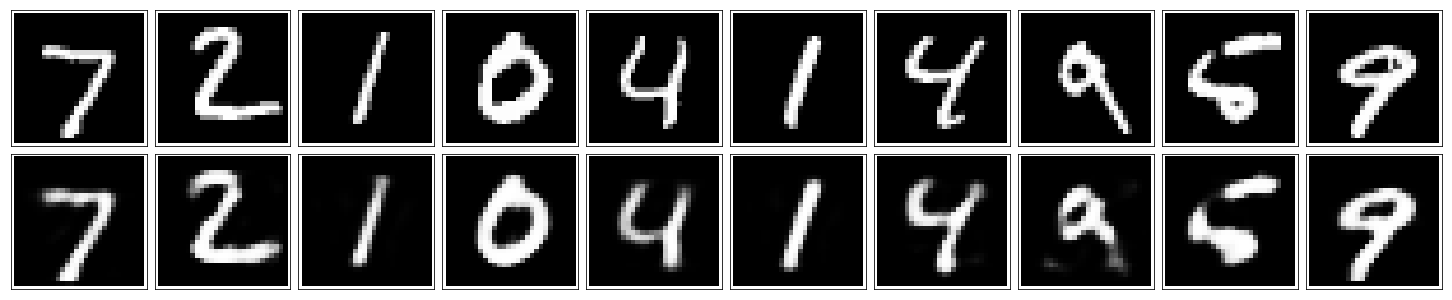

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.